# A - Simulación física ideal

- *Luis Miguel Sánchez Brea*
- *16 de junio de 2020*

Se simula un experimento de difracción ideal, donde la máscara (supuestamente cargada en un SLM) puede ser de amplitud o de fase.

La simulacion se realiza mediante el software diffractio.

Solamente se considera el comportamiento escalar.

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
from diffractio import np, sp, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

In [5]:
sizex, sizey = 500*um, 500*um

x=np.linspace(-sizex/2, sizex/2, 512)
y=np.linspace(-sizey/2, sizey/2, 512)
wavelength=0.6328*um

In [6]:
u0=Scalar_source_XY(x,y,wavelength)
u0.plane_wave(A=1, theta=0, phi=0)

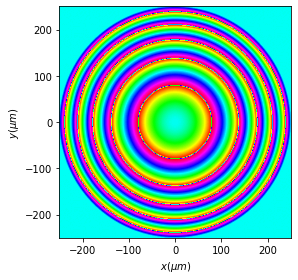

In [7]:
radius=min(sizex/2,sizey/2)
focal=10*mm
mask=Scalar_mask_XY(x,y,wavelength)
mask.lens(r0=(0,0), radius=(radius,radius), focal=focal)
mask.draw('phase');

In [8]:
u1=u0*mask

In [9]:
u2 = u1.RS(z=focal)
size_focus = 60 * um
u3 = u2.cut_resample(
    x_limits=[-size_focus, size_focus],
    y_limits=[-size_focus, size_focus],
    num_points=[512, 512],
    new_field=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fcad2fefef0>)

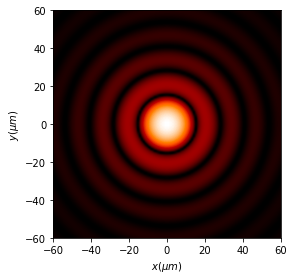

In [10]:
u3.draw(logarithm=1)

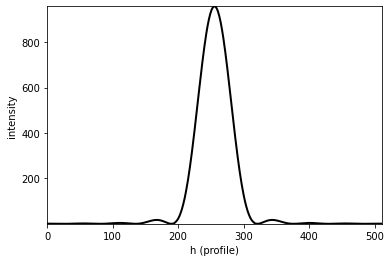

In [11]:
u3.draw_profile(point1=[-size_focus,0], point2=[size_focus,0]);

## Video

In [12]:
z=np.linspace(focal-2*mm, focal+2*mm, 64)

In [13]:
u_xyz=Scalar_field_XYZ(x,y,z,wavelength)
u_xyz.incident_field(u1)
u_xyz.RS()

time in RS= 51.24080848693848. num proc= 6


51.24080848693848

In [14]:
size_focus = 80 * um

u_xyz_focus=u_xyz.cut_resample(x_limits=[-size_focus, size_focus],
    y_limits=[-size_focus, size_focus],
    num_points=[512, 512, len(z)],
    new_field=True)

In [15]:
u_xyz_focus.draw_XYZ()

In [16]:
u_xyz_focus.video('results/procedure - A - Simulacion física ideal.mp4',fps=10,verbose=True)